In [35]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import read_rijksdata
import matplotlib as mpl
# plot settings
label_size = 14
mpl.rcParams['legend.fontsize'] = label_size
mpl.rcParams['axes.labelsize'] = label_size 
mpl.rcParams['axes.labelpad'] = 10
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size


In [16]:
names_ = pd.read_csv('names.txt',delimiter = '/t',header=None, engine='python')
names_ = np.array(names_)

In [12]:
img_folder = '/Users/erebor/Downloads/out_img'

In [13]:
images, labels_onehot, labels, names = read_rijksdata.load_data(MIN_NUM_ARTWORK=0,
                                                 img_folder =img_folder,
                                                 labels_file='labels.txt',
                                                 names_file='names.txt')

Loading 112039 artworks...
 |███████████████████████████████████████-| 112038/112039 

Throwing away artwork with no artist...

Filtering for artists with at least 0 artworks...
 |████████████████████████████████████████| 6622/6622 

Dataset loaded!
images shape: (94668, 56, 56, 3)
labels shape: (94668,)
labels (one-hot): (94668, 6620)
names shape: (94668, 1)


In [14]:
counts = pd.DataFrame(labels).value_counts()
print(counts)

3718    1928
4766    1504
5004    1384
1981    1267
2819    1148
        ... 
2221       1
2220       1
2219       1
4556       1
6620       1
Length: 6620, dtype: int64


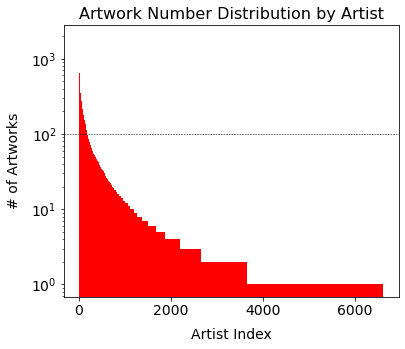

In [69]:
fig = plt.figure(figsize=(6,5))
fig.patch.set_facecolor('white')
plt.bar(x=list(range(len(counts))),height=list(counts),align='center',width=1,color='red')
plt.xlabel('Artist Index')
plt.ylabel('# of Artworks')
plt.title('Artwork Number Distribution by Artist',fontsize=16)
#plt.ylim(1,1000)
plt.yscale('log')
plt.axhline(100,color='black',ls='dashed',lw=0.8)
plt.savefig('artist_cut.png',dpi=300, transparent=False)
plt.show()

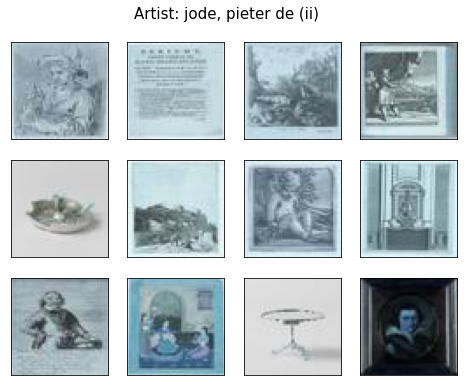

In [83]:
# get indicies of artists with greater than 50 works


min_idx = list(counts[counts>50].index)
min_idx = [idx[0] for idx in min_idx] # rewrite as indicies list
ex_idx = np.random.choice(min_idx,size=1) # pick random artist

# find images for the particular artist 
# get indicies of particular artist in the dataset
im_ex_idx = np.where(labels==ex_idx)[0] 
ex_images = images[im_ex_idx,:,:,:] # get images
artist = names[im_ex_idx[0]][0] # get artist name

# plot a selection of 25 (5x5) artwork
fig, axes = plt.subplots(figsize=(8,6),nrows=3,ncols=4)
fig.patch.set_facecolor('white')

i = 0 
for ax in axes.reshape(-1): 
    ax.imshow(ex_images[i,:,:,:])
    ax.set_xticks([]),ax.set_yticks([])
    i +=1
plt.suptitle('Artist: {}'.format(artist),fontsize=15)
fig.subplots_adjust(top=0.9)
plt.savefig('artist_example_0.png',dpi=200, bbox_inches='tight')
plt.show()
plt.close()